# Engineering Colleges Case Study - Problem statement
Education is fast becoming a very competitive sector with hundreds of institutions to choose from. It is a life transforming experience for any student and it has to be a thoughtful decision. There are ranking agencies which do a survey of all the colleges to provide more insights to students. Agency RankForYou wants to leverage this year's survey to roll out an editorial article in leading newspapers, on the state of engineering education in the country. Head of PR (Public Relations) comes to you, the data scientist working at RankForYou, and asks you to come up with evidence based insights for that article.

# Objective
To identify different types of engineering colleges in the country to better understand the state of affairs.

## Key questions to be answered -

- How many different types (clusters/segments) of colleges can be found from the data?
- How are these different types of colleges different from each other? Please provide a profile summary of the         clusters/segments you come up with. (These are your insights)
- Do you get slightly different solutions from two different techniques? How would you explain the difference?

**About the Dataset**

The data is for 26 EngineeringColleges. The initial survey data has been summarized into a rating scale of 1-5 for different factors.

**Factor rating index**
 - 1 - Very low
 - 2 - Low
 - 3 - Medium
 - 4 - High
 - 5 - Very high
 
 
**Data Dictionary**
 - SR_NO : Serial Number
 - Engg_College : 26 Engineering colleges with pseudonyms A to Z
 - Teaching : Quality of teaching at the engineering college
 - Fees : Fees at the engineering college
 - Placements : Job placements after a student graduates from the engineering college
 - Internship : Student Internships at the engineering college
 - Infrastructure : Infrastructure of the engineering college

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
# Reading the dataset 
path = 'C:/Users/Arijit Das/Downloads/'
df = pd.read_excel(path+'Engineering Colleges Case Study - Dataset.xlsx')

In [3]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [4]:
#dropping the serial no. column as it does not hold any statistical significance
df.drop('SR_NO',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Engg_College    26 non-null     object
 1   Teaching        26 non-null     int64 
 2   Fees            26 non-null     int64 
 3   Placements      26 non-null     int64 
 4   Internship      26 non-null     int64 
 5   Infrastructure  26 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


**Observations**
- We have 26 rows and 6 columns in the data
- Engg_College is a categorical variable with 26 levels which indicate each college names
- The 5 rating variables are of type 'integer'

In [6]:
df.describe()

,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2.807692,3.576923,2.884615,2.769231,3.384615
std,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.250000,1.250000,2.000000,3.000000
50%,3.000000,4.000000,3.000000,2.000000,3.000000
75%,3.000000,5.000000,4.000000,4.000000,4.750000
max,5.000000,5.000000,5.000000,5.000000,5.000000


**Observations**
- Median of Fees is 4 indicating most of the engineering colleges have high fees
- The mean and median of other ratings lie in 2-3 as expected 


In [7]:
df.isna().sum()

Engg_College      0
Teaching          0
Fees              0
Placements        0
Internship        0
Infrastructure    0
dtype: int64

There are no missing values in our data

# EDA

### Univariate Analysis

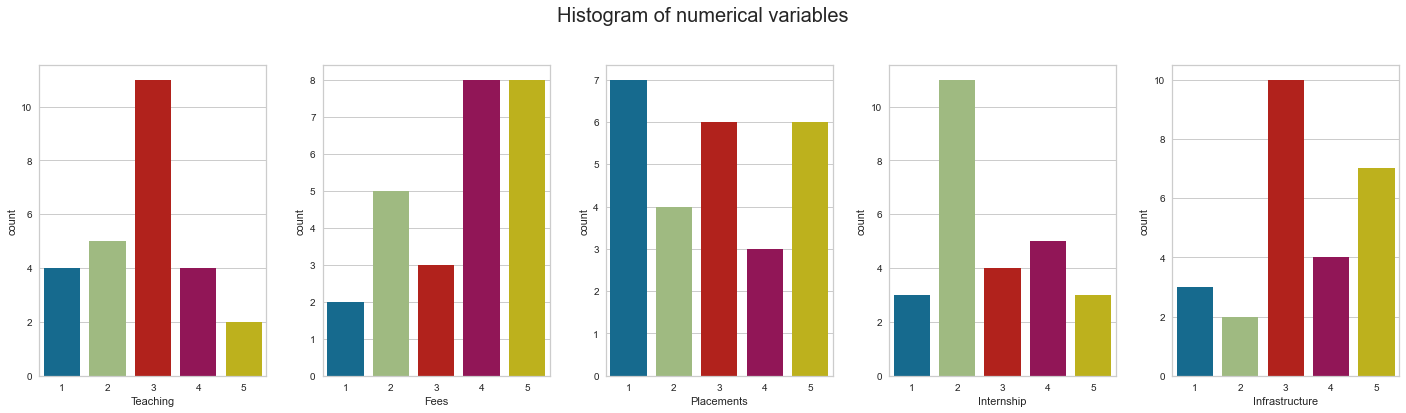

In [8]:
all_col = df.iloc[:,1:].columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.countplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations**
- Most of the colleges have got 3 as rating for teaching
- Fees in most of the colleges high
- Most of the colleges have 2 as rating for placements

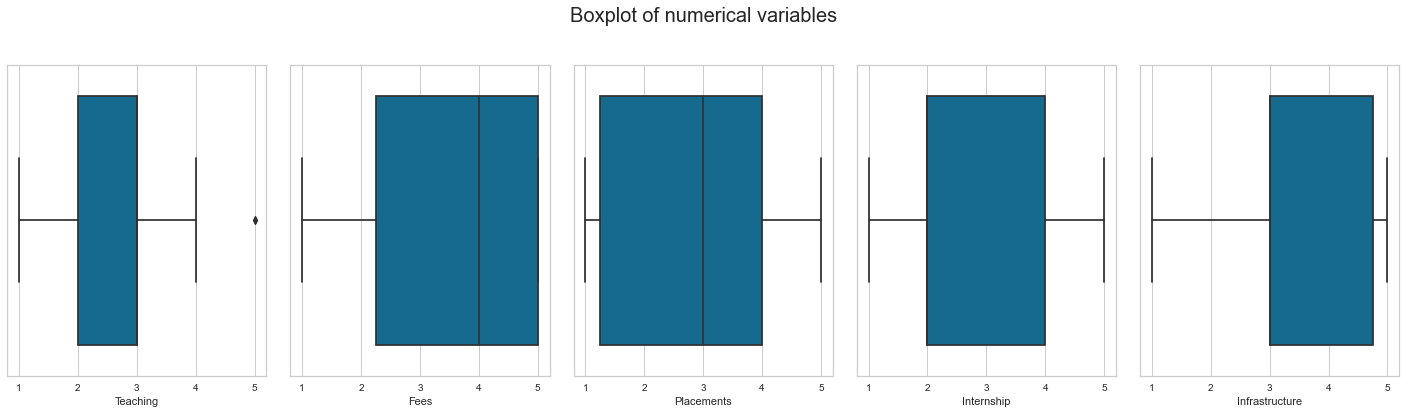

In [9]:
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],x=df[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Observations**
- 50 % of colleges have rating off 2 and 3
- 50 % of colleges have fees high or very high
- 75 % of colleges have rating less than 4 in placements
- 75 % of colleges have 3 more rating in infrastructure

### Bivariate Analsysis

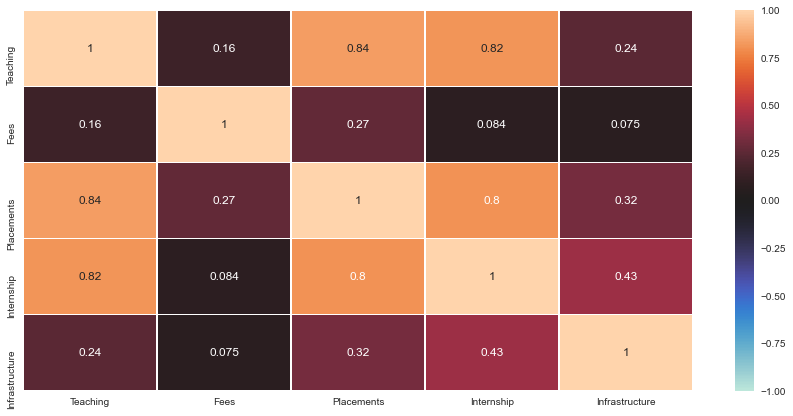

In [10]:
plt.figure(figsize=(15,7))

sns.heatmap(df[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

**Observation**
- Teaching is strongly positively correlated with Placement and internships, which is obvious because if teaching quality is high, students are more likely to get placements and internships.

### Lets make pairplots

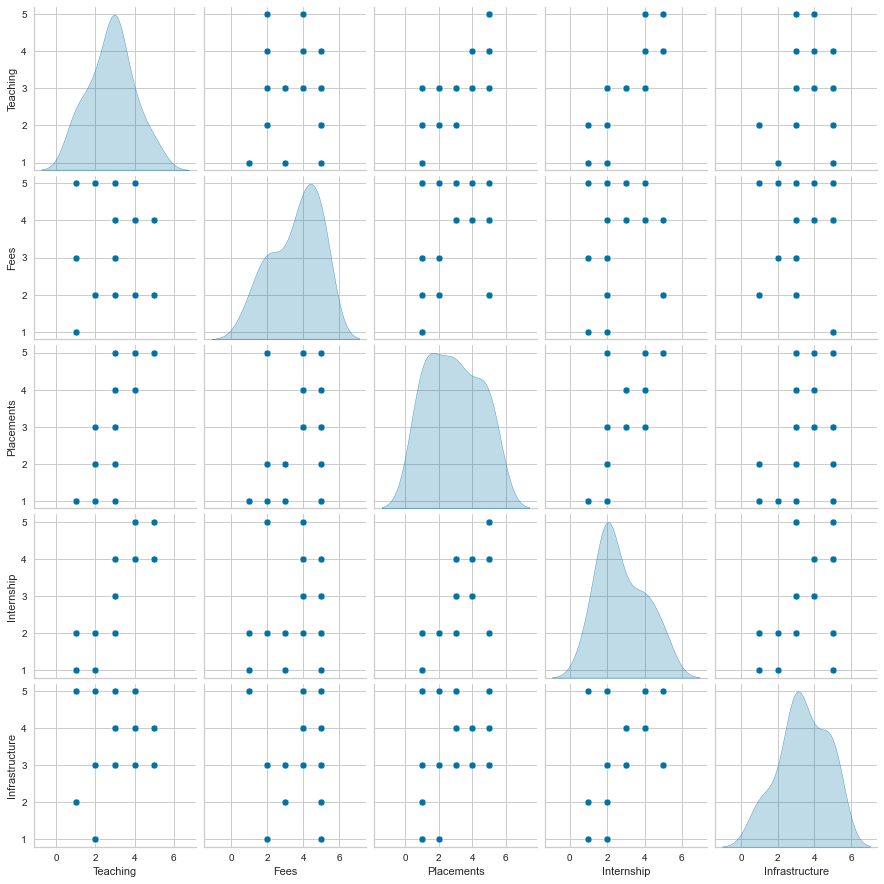

In [11]:
sns.pairplot(df[all_col],diag_kind="kde")

**Observations**
- Teaching is normally distributed
- Distribution of fees seems to be bimodal
- Distribution of Internships seems to be bimodal

In [12]:
# Scaling the data set before clustering
scaler=StandardScaler()
subset=df[all_col].copy()
subset_scaled=scaler.fit_transform(subset)   

In [13]:
#Creating a dataframe from the scaled data above
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.087990295998642
Number of Clusters: 2 	Average Distortion: 1.6030760049686552
Number of Clusters: 3 	Average Distortion: 1.3542868697697457
Number of Clusters: 4 	Average Distortion: 1.1658645562214658
Number of Clusters: 5 	Average Distortion: 1.0290612283501503
Number of Clusters: 6 	Average Distortion: 0.9095886756490557
Number of Clusters: 7 	Average Distortion: 0.8210830918162462
Number of Clusters: 8 	Average Distortion: 0.7161563518185236


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

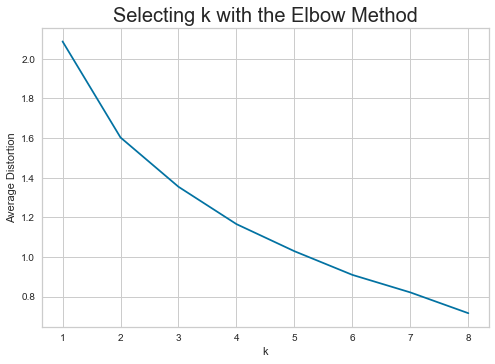

In [14]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

The appropriate value of k from elbow curve seems to be 4 or 5

### Lets us check silhoutte score

In [15]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3347415593639785)
For n_clusters = 3, silhouette score is 0.2896589939792401)
For n_clusters = 4, silhouette score is 0.3490226771698325)
For n_clusters = 5, silhouette score is 0.3578484211066675)
For n_clusters = 6, silhouette score is 0.3751606440274479)
For n_clusters = 7, silhouette score is 0.3661442615367182)
For n_clusters = 8, silhouette score is 0.3975512934421172)
For n_clusters = 9, silhouette score is 0.3877165782852194)


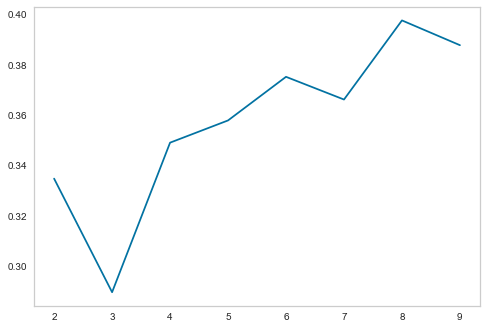

In [16]:
plt.plot(cluster_list,sil_score)
plt.grid()

From silhouette score, it seems that 7 is good value of k

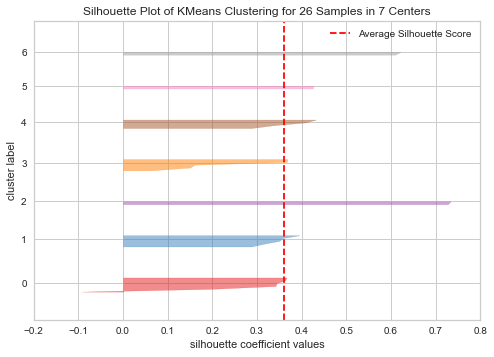

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [17]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

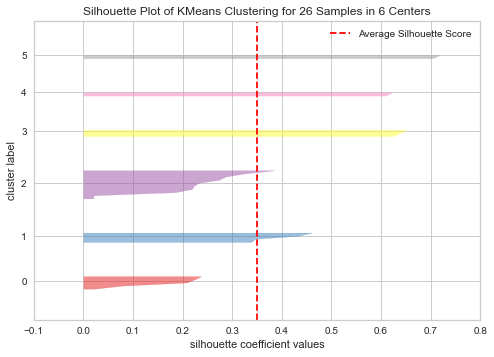

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

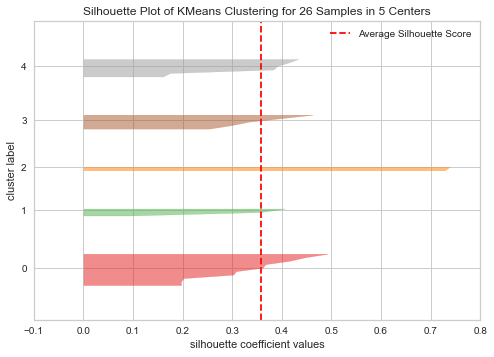

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

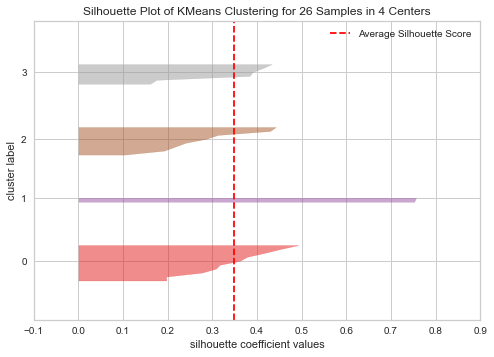

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 26 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
#Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(subset_scaled_df)    
visualizer.show()

### Let us take 5 as appropriate no. of clusters as silhoutte score is high enough and there is knick at 5 in elbow curve.

In [21]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=0)

In [22]:
df['K_means_segments'] = kmeans.labels_

In [23]:
cluster_profile = df.groupby('K_means_segments').mean()

In [24]:
cluster_profile['count_in_each_segment'] = df.groupby('K_means_segments')['Fees'].count().values

In [25]:
cluster_profile

,Teaching,Fees,Placements,Internship,Infrastructure,count_in_each_segment
K_means_segments,,,,,,
0,2.750000,4.625000,3.375000,2.500000,3.500000,8
1,3.833333,4.166667,4.166667,4.166667,4.666667,6
2,2.125000,3.125000,1.375000,1.750000,2.000000,8
3,4.500000,2.000000,5.000000,5.000000,3.000000,2
4,1.000000,1.000000,1.000000,1.500000,5.000000,2


<AxesSubplot:xlabel='K_means_segments'>

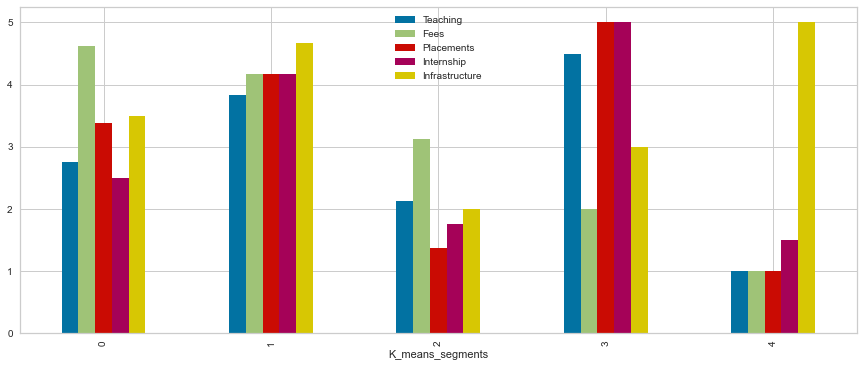

In [26]:
df.groupby('K_means_segments').mean().plot.bar(figsize=(15,6))

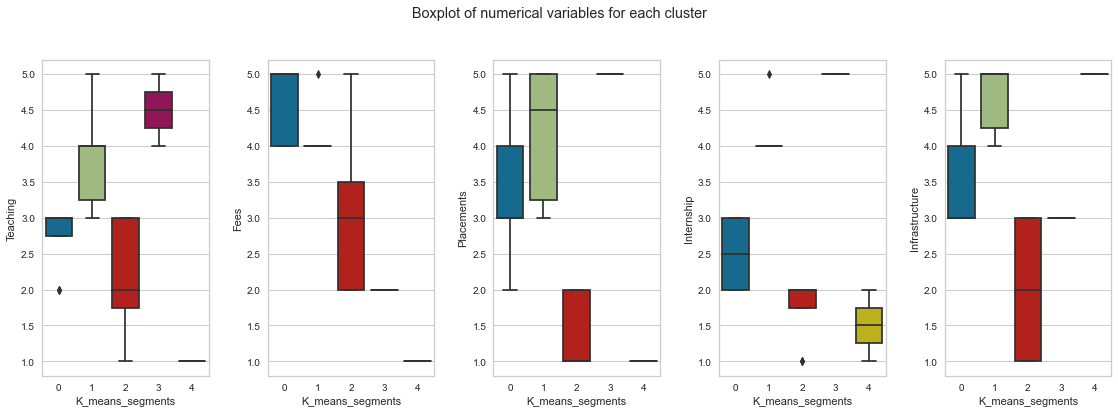

In [27]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster')
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=df[all_col[counter]],x=df['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

**Insights**
- Clusters 0 :
    - Teaching rating is around 3 for majority of its colleges
    - Fees is very high of colleges in this cluster
    - Placements rating is spread over rating from 2 to 5 
    - Internship is medium
    - Infrastructure is medium to high
- Cluster 1 :
    - Teaching is medium to high for majority of colleges in this cluster
    - Fess is high
    - Placements is medium to very high
    - Internship is high
    - Infrastructure is high to very high for majority of colleges in this cluster
- Cluster 2 :
    - Teaching is very low to medium
    - Fee is low to very high
    - Placements is very low
    - Internship is low
    - Infrastructure is also low
- Cluster 3:
    - Teaching is high to very for majority of colleges in this cluster
    - Fee is low
    - Placements is very high
    - Internship is very high
    - Infrastructure is medium

- Cluster 4:
    - Teaching is very low
    - Fees is very low
    - Placements is very low
    - Internship is low
    - Infrastructure is very high
    

### Business recommendation
- Cluster 3 (Tier 1 Colleges) - have excellent teaching, placements & 
  internships while Infrastructure and fees are at satisfactory levels.
   - **Recommendation - Corporates looking for best candidates can approach this cluster for placements and internships**
- Cluster 0 (Tier 2 Colleges) - Medium performing colleges with high fees
   - **Recommendation - Scope for Improvements in Teaching, Placements and internships - Tie-ups with corporates, Edu-tech and training entities. Companies providing training program to staffs and students should approach them.**

- Cluster 2 (Tier 3 Colleges) - Poor performing colleges/new college
   - **Recommendation - These cluster of colleges Will need to concentrate more on Marketing and Advertisements about their campus to create awareness and attract students.**

### Business Recommendation

- **Cluster 3**: These are the Tier 1 Colleges and have excellent teaching, placements & internships, while maintaining a moderate infrastructure and low fees. **Corporates looking for best candidates can approach this cluster for placements and internships.**

- **Cluster 1**: These are the Tier 2 Colleges which are just behind the Tier 1 colleges in terms of teaching and placements, but provide quite better infrastructure and are accordingly more expensive. **They have a scope for improvements in teaching, placements and internships, and should consider tie-ups with corporates, edu-tech and training organizations. Companies providing training program to faculty and students should approach them.**

- **Cluster 0**: These are the Tier 3 colleges which have high fees and good infrastructure, but do not offer proper value-for-money in terms of teaching and placements. **These cluster of colleges will need to concentrate more towards onboarding better faculty and securing tie-ups with corporates to improve placement opportunities.**

- **Cluster 2 and Cluster 4**: These are the poor performing colleges or new colleges. **These colleges will need to concentrate more on marketing and advertisements about their offerings to create awareness and attract students.**